In [12]:
import networkx as nx
import geopandas as gpd
import os.path as osp

In [208]:
base_dir = "/home/fiona/birdMigration/data/preprocessed/radar/fall/2016"
base_dir = "/home/fiona/birdMigration/data/raw/radar/fall/2015"
G = nx.read_gpickle(osp.join(base_dir, "delaunay.gpickle"))

In [209]:
df = gpd.read_file(osp.join(base_dir, 'voronoi.shp'))

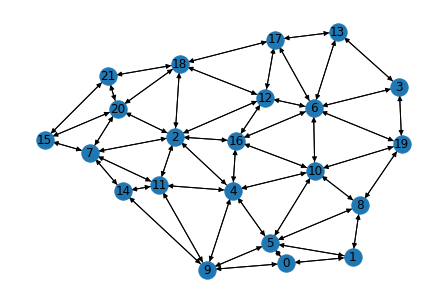

In [210]:
pos = {ridx:(df[df.radar == name].x.values[0], df[df.radar == name].y.values[0]) for (ridx, name) in nx.get_node_attributes(G, 'radar').items()}
nx.draw(G, pos=pos, with_labels=True)

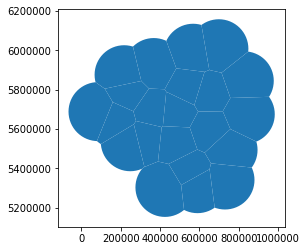

In [211]:
df.plot()

In [146]:
pts= gpd.GeoSeries([geometry.Point((x,y)) for x, y in zip(df.lon.values, df.lat.values)],
                                        crs=f'EPSG:4326')

In [147]:
proj4stereo = '+proj=stere +lat_0=0 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

from scipy.spatial import Delaunay
import numpy as np
pts_stereo = pts.to_crs(proj4stereo)
pts_equidist = pts.to_crs(epsg='32632')
points_stereo = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts_stereo])
points_lonlat = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts])
points_equidist = np.array([[p.xy[0][0], p.xy[1][0]] for p in pts_equidist])

In [148]:
tri_stereo = Delaunay(points_stereo)
tri_lonlat = Delaunay(points_lonlat)
tri_equidist = Delaunay(points_equidist)

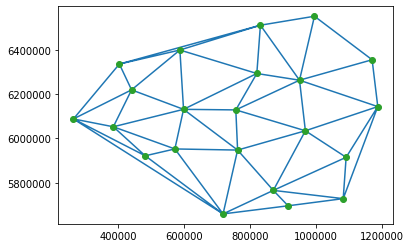

In [105]:
plt.triplot(points_stereo[:,0], points_stereo[:,1], tri_stereo.simplices)
plt.plot(points_stereo[:,0], points_stereo[:,1], 'o')
plt.show()

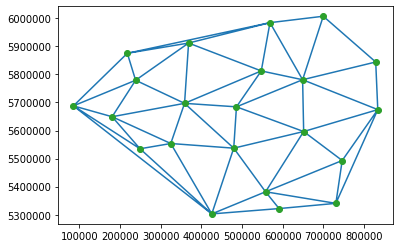

In [149]:
plt.triplot(points_equidist[:,0], points_equidist[:,1], tri_stereo.simplices)
plt.plot(points_equidist[:,0], points_equidist[:,1], 'o')
plt.show()

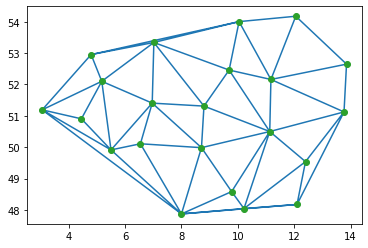

In [107]:
plt.triplot(points_lonlat[:,0], points_lonlat[:,1], tri_lonlat.simplices)
plt.plot(points_lonlat[:,0], points_lonlat[:,1], 'o')
plt.show()

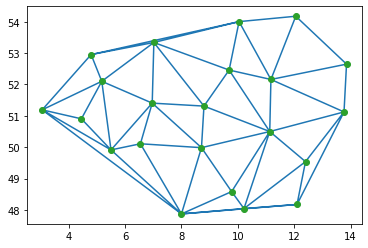

In [110]:
plt.triplot(points_lonlat[:,0], points_lonlat[:,1], tri_equidist.simplices)
plt.plot(points_lonlat[:,0], points_lonlat[:,1], 'o')
plt.show()

In [113]:
def triangle_csc(pts):
    rows, cols = pts.shape

    A = np.bmat([[2 * np.dot(pts, pts.T), np.ones((rows, 1))],
                 [np.ones((1, rows)), np.zeros((1, 1))]])

    b = np.hstack((np.sum(pts * pts, axis=1), np.ones((1))))
    x = np.linalg.solve(A,b)
    bary_coords = x[:-1]
    return np.sum(pts * np.tile(bary_coords.reshape((pts.shape[0], 1)), (1, pts.shape[1])), axis=0)

triangles = tri.points[tri.vertices]
circum_centers = np.array([triangle_csc(t) for t in triangles])

In [114]:
circum_centers

array([[-649813.1564863 , 4667158.07629746],
       [1021564.30986439, 6399962.74562343],
       [1087579.92103743, 6242448.67459066],
       [ 815438.87023309, 5681284.28183398],
       [ 983421.14201343, 5789423.44249245],
       [ 729117.95016492, 5805096.82523931],
       [ 942268.64537641, 6412413.32547266],
       [-278548.7674633 , 8607599.63786197],
       [ 263035.57167161, 5861847.83572536],
       [ 675368.99072182, 6035927.19793258],
       [ 900159.87549407, 5906881.49177855],
       [1044040.18158969, 6155770.58171902],
       [ 889230.88467775, 6143684.92386395],
       [ 843339.34860765, 6040952.24081558],
       [ 730780.39110061, 6407351.07598601],
       [ 912656.53703329, 6398273.64136948],
       [ 862205.08268041, 6182609.09636601],
       [ 678848.30326235, 6253667.04168969],
       [ 667830.34891271, 6268792.06591419],
       [ 515456.5493304 , 6307797.06909283],
       [ 568423.55297336, 6264664.93614028],
       [ 483590.60624646, 6112605.56930222],
       [ 2